# Synthetic Data Generation and Simple Classification
## This notebook follows the data generation strategy and classification examples outlined in Section 2.3.3 of <a href="https://web.stanford.edu/~hastie/Papers/ESLII.pdf">The Elements of Statistical Learning | Hastie, Tibshirani, Friedman</a> It also implements linear regression and k-Nearest Neighbors as outlined in the textbook. The purpose is to give a rudimentary explanation of linear regression and k-NN (we will discuss them in more depth later) as well as some examples of using the Python programming language.
This notebook first generates synthetic data following the procedure outlined below from Section 2.3.3 of the textbook:

"First we generated 10 means $m_k$ from a bivariate Gaussian distribution $N\left((1,0)^T,\mathbf{I}\right)$ and labeled this class <font color='blue'>BLUE</font>. Similarly, 10 more were drawn from $N\left((0,1)^T,\mathbf{I}\right)$ and labeled class <font color='orange'>ORANGE</font>. Then for each class we generated 100 observations as follows: for each observation, we picked an $m_k$ at random with probability 1/10, and then generated a $N\left(m_k,\mathbf{I}/5\right)$, thus leading to a mixture of Gaussian clusters for each class."

### Initializing the script
We start by importing numpy to use for generating random numbers and matplotlib (pyplot) for visualizing the data. We also seed the random number generator such that we can either ensure (pseudo)randomness or replicate a result.

In [188]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(8675309)

### Choosing the means of each Gaussian mixture
Next we can begin following the routine from the book. We will generate 10 means from each of the two bivariate Gaussian distributions $N\left((1,0)^T,\mathbf{I}\right)$ (<font color='blue'>BLUE</font>) and $N\left((0,1)^T,\mathbf{I}\right)$ (<font color='orange'>ORANGE</font>) using the multivariate_normal function from numpy. The arguments for this function are the mean, covariance, and number of samples, respectively. We will plot the means for each mixture (as appropriately colored dots) as well as the mixture "centers" (as appropriately colored Xs). You will notice 10 colored dots for each class and one mixture center (X) for each.

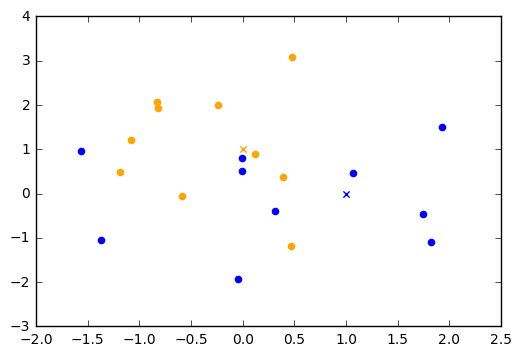

In [194]:
# Generate 10 random values from the Blue (0) class bivariate Normal distribution for use as means
mB = np.random.multivariate_normal( [1,0], np.identity(2), size=(10,) )

# Generate 10 random values from the Orange (1) class bivariate Normal distribution for use as means
mO = np.random.multivariate_normal( [0,1], np.identity(2), size=(10,) )

# Plot the chosen means and mixture centers
fig1, ax1 = plt.subplots()
# Plot the means of the blue mixture as blue dots
ax1.scatter( mB[:,0], mB[:,1], marker='o', color='blue'), plt.hold('on')
# Plot the means of the orange mixture as orange dots
ax1.scatter( mO[:,0], mO[:,1], marker='o', color='orange')
# Plot the mixture centers as Xs
ax1.scatter( 1, 0, marker='x', color='blue')
ax1.scatter( 0, 1, marker='x', color='orange')
plt.show()

Notice that the Xs (very) roughly define the centers of the two clusters. Also note that the two mixtures overlap, i.e., are not linearly separable.

### Generate 100 random observations
The next step is to generate 100 random observations from each class. Per the textbook's strategy, we first randomly sample one of the 10 means $m_k$, then generate a random sample from a normal distribution centered on the chosen $m_k$ with covariance $\mathbf{I}/5$. You'll notice in the code below that we generate a random index between 0 and 9 (which defines which mean ($m_k$) to use) then generate a random sample for each class using the randomly selected mean.

In [195]:
# Generate 100 random data points for each class using the indices calculated above and generate class labels
Xb = np.zeros((100,2))
Xo = np.zeros((100,2))
for ii in range(0,100):
    rand_ind = np.random.randint( 0, 10, size=(1,))
    Xb[ii,:] = np.random.multivariate_normal( mB[rand_ind[0,]], np.identity(2)/5, size=(1,) )
    Xo[ii,:] = np.random.multivariate_normal( mO[rand_ind[0,]], np.identity(2)/5, size=(1,) )

### Synthesize data matrix and label vector
It is often convenient to create a single data matrix X and label vector (in fact we'll need this data matrix later). Here we'll simply concatenate the <font color='blue'>BLUE</font> samples and <font color='orange'>ORANGE</font> samples into a single matrix. To create the label vector, we simply concatenate 100 zeros (corresponding to the <font color='blue'>BLUE</font> class) and 100 ones (corresponding to the <font color='orange'>ORANGE</font> class).

In [196]:
# Concatenate data into single matrix X & define class labels ( 0 - Blue | 1 - Orange )
X = np.concatenate( (Xb,Xo), axis = 0 )
y = np.concatenate( (np.zeros( 100 ), np.ones( 100 )), axis = 0 )

### Visualizing the data
Finally, we make a scatter plot of the data. Notice that the distribution of the data is similar to that shown in Figure 2.1 in the textbook.

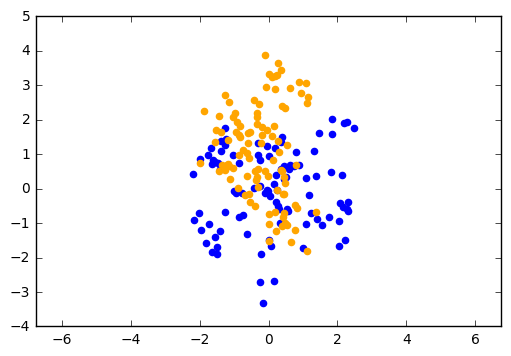

In [198]:
fig2, ax2 = plt.subplots()
ax2.scatter( Xb[:,0], Xb[:,1], marker='o', color='blue')
ax2.scatter( Xo[:,0], Xo[:,1], marker='o', color='orange')
plt.axis('equal')
plt.show()

Notice that there is significant overlap between the two clusters. We'll see later that we are unable to perfectly classify the points using a linear classifier.

# Least Squares
### "Training a model" or "Learning $\beta$"
Now that we have the data, we can use the least squares approach to model the data. The method is outlined in Section 2.3.1 of the textbook (particularly Equation 2.6), but the most important bit is the closed form solution of $$\hat{\beta}=\left(X^T X\right)^{-1}X^T \mathbf{y},$$ where $X$ is the data matrix (with appended 1's), and $\mathbf{y}$ is the vector of $y_i$'s. The code below will append a 1 to each data point and compute $\hat{\beta}$.

In [200]:
# Calculate beta (argmin RSS(beta), eq. 2.6)
Xwith1 = np.concatenate((np.ones((X.shape[0],1)),X),axis=1)

XT = np.transpose(Xwith1)
beta = np.dot( np.dot( np.linalg.inv( np.dot( XT, Xwith1 ) ), XT ), y )

print "An example sample from X: {x}".format(x=X[1,:])
print "An example sample from X augmented with a 1: {x}".format(x=Xwith1[1,:])
print "Beta is {beta}".format(beta=beta)

An example sample from X: [ 2.20692027 -1.4870605 ]
An example sample from X augmented with a 1: [ 1.          2.20692027 -1.4870605 ]
Beta is [ 0.42087453 -0.04693046  0.14433474]


Notice in the printout that the *1s* were appended before the first element of $x_i$. This also could have been implemented by appending the *1s* after the last element of $x_i$; the former method was arbitrarily chosen for this example. Consequently, the first element of $\hat{\beta}$ corresponds to the bias (offset) of the hyperplane, $\beta_0$, such that $\hat{\beta}=\left(\beta_0 \ \beta_1 \ \beta_2\right)^T$.

### More visualization <a id='moreviz'></a>
To classify a set of points using the model ($\hat{\beta}$) we simply perform the matrix-vector product $\hat{Y}=X\hat{\beta}$, where $X$ is the augmented data matrix (i.e., the data matrix appended with 1s). If the result is less than 0.5 we classify the point as <font color='blue'>BLUE</font> and if the result is greater than 0.5 we classify it as <font color='orange'>ORANGE</font>. Below, we will classify "every" point in the plane to see the results of the least squares method. Note that we will not actually classify every point in the plane (since there are an infinite number of them), we'll discretize it and only classify a relatively small number of them. We'll color these points as their respective class. Finally, we'll also color points that lie within $\epsilon=0.002$ of the decision boundary (i.e., $|x_i^T\hat{\beta}-0.5|<\epsilon$) as black. Note that $\epsilon=0.002$ was chosen arbitrarily such that the decision boundary was clearly shown.

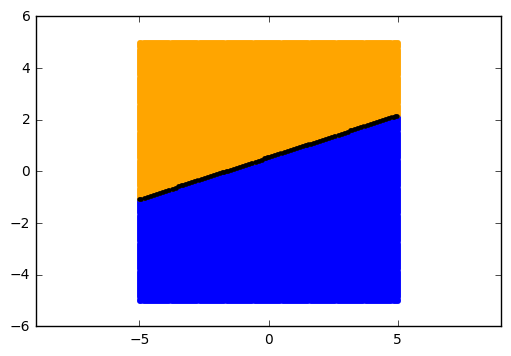

In [211]:
nps = 250 # number of points to create per dimension
eps = 0.002 # for plotting hyperplane

# generate all the points we want to classify in the plane and aggregate (with 1s) in a single matrix
xx = np.linspace(-5, 5, nps)
yy = np.linspace(-5, 5, nps)
xs, ys = np.meshgrid(xx, yy)

Xplane = np.zeros((nps*nps,2))
Xplane[:,0] = xs.ravel()
Xplane[:,1] = ys.ravel()
Xplane1 = np.concatenate((np.ones((Xplane.shape[0],1)),Xplane),axis=1)

# classify all points via X*beta
y_plane = np.dot(Xplane1,beta)

# plot all the points we classified as well as the hyperplane
fig3, ax3 = plt.subplots()
ax3.scatter( Xplane[y_plane<=0.5,0], Xplane[y_plane<=0.5,1], marker='.', color='blue'), plt.hold('on')
ax3.scatter( Xplane[y_plane>0.5,0], Xplane[y_plane>0.5,1], marker='.', color='orange')
ax3.scatter( Xplane[np.abs(y_plane-0.5)<eps,0], Xplane[np.abs(y_plane-0.5)<eps,1], marker='.', color='black')
plt.axis('equal')
plt.show()

### "Classification" and inspecting accuracy <a id='LSacc'></a>
Here we will repeat the visualization from classification of the plane above with the training data layered on top to see all of the misclassifications.

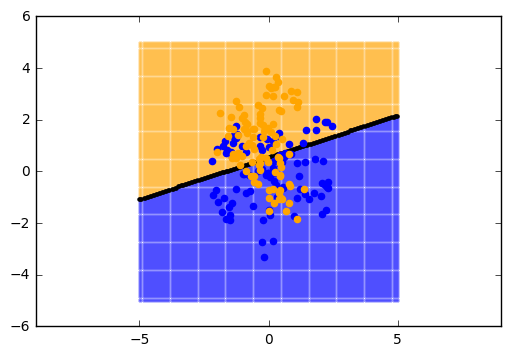

In [219]:
# plot all the points in the plane, the hyperplane, and the training data.
fig4, ax4 = plt.subplots()
ax4.scatter( Xplane[y_plane<=0.5,0], Xplane[y_plane<=0.5,1], marker='.', color='blue', s=0.1), plt.hold('on')
ax4.scatter( Xplane[y_plane>0.5,0], Xplane[y_plane>0.5,1], marker='.', color='orange', s=0.1)
ax4.scatter( Xplane[np.abs(y_plane-0.5)<eps,0], Xplane[np.abs(y_plane-0.5)<eps,1], marker='.', color='black')
ax4.scatter( Xb[:,0], Xb[:,1], marker='o', color='blue')
ax4.scatter( Xo[:,0], Xo[:,1], marker='o', color='orange')
plt.axis('equal')
plt.show()

Every blue sample overlapping with an orange background and every orange sample overlapping with a blue background is misclassified by the least squares method. Conversely, every blue sample overlapping a blue background and every orange sample overlapping with an orange background is correctly classified. It is often useful to calculate the prediction accuracy of a model. Prediction accuracy is given by $$A=\frac{number of correctly classified points}{total number of points classified}.$$ The code below prints out some accuracy statistics after classifying the training data using the model.

In [243]:
# Calculate least squares' prediction for each training sample
y_hat = np.dot(Xwith1,beta)
y_hat[ y_hat>0.5 ] = 1
y_hat [y_hat<=0.5 ] = 0

n_correct = sum(y_hat==y)
n_incorrect = sum(y_hat!=y)
total_points = n_correct + n_incorrect # this will be 200 since that's what we defined above

acc = n_correct / float(total_points)

print "Out of 200 points..."
print "The number of correctly classified points is {nc}.".format(nc=n_correct)
print "The number of misclassified points is {ni}.".format(ni=n_incorrect)
print "The classification accuracy is {acc}%.".format(acc=100*acc)

Out of 200 points...
The number of correctly classified points is 134.
The number of misclassified points is 66.
The classification accuracy is 67.0%.


Or in other words, a third of the data was not classified correctly.

# k-Nearest Neighbors
Section 2.3.2 in the textbook explains that k-NN forms its prediction by the sample mean of the class labels that lie within the $k$-neighborhood of the data point it is classifying. In other words, if $N_k(x)$ is the neighborhood of $x$ defined by the $k$ closest points $x_i$ in the training set, then the prediction is (Equation 2.8 in the textbook) $$\hat{Y}=\frac{1}{k}\sum_{x_i \in N_k(x)} y_i.$$

### Defining a Distance Metric
We must define a distance metric to use to calculate the similarity between samples. For this example we'll use Euclidean distance, i.e., $\|\mathbf{x}-\mathbf{y}\|_2$.

In [296]:
# define a distance metric
def dist_metric( x, y ):
    '''
    x - a single observation
    y - a matrix of observations
    '''
    # Euclidean distance
    d = np.sqrt( np.sum( np.square(x - y), axis=1 ) )
    return d;

### Implementing k-NN <a id='kNN implementation'></a>
Here we'll classify samples from the training data using k-NN with $k=15$. For each data point, we will compute the distance between it and all other samples in the training data. The 15 closest samples become the $N_{15}$ neighborhood, and the classification is the average class label across $N_{15}$.

In [347]:
k = 15

# Initialize label vectors
ynnp = np.zeros(y.shape[0])
ynn_hat = ynnp

# Iterate through all points in the training set and classify them via k-NN (k=15)
for ii in range(0,X.shape[0]):
    xt = X[ii,:] # choose test point
    
    # Calculate distance between test point xt and all other training samples X
    d = dist_metric( xt, X )
    
    # Identify the k=15 neighborhood
    tempinds = np.argsort( d )
    N_inds = tempinds[ 0:k ] # indices of k nearest neighbors
    
    # Average the labels of all members in the neighborhood
    ynnp[ii] = np.mean( y[ N_inds ] )

# Convert predictions to class labels
ynn_hat[ ynnp>0.5 ] = 1
ynn_hat [ynnp<=0.5 ] = 0

### Inspecting the Accuracy <a id='kNNacc'></a>
We can also show some statistics for this classifier similar to that shown in [the least squares accuracy section](#LSacc). In fact, the code is essentially the same.

In [348]:
n_correct = sum(ynn_hat==y)
n_incorrect = sum(ynn_hat!=y)
total_points = n_correct + n_incorrect # this will be 200 since that's what we defined above

acc = n_correct / float(total_points)

print "Out of 200 points..."
print "The number of correctly classified points is {nc}.".format(nc=n_correct)
print "The number of misclassified points is {ni}.".format(ni=n_incorrect)
print "The classification accuracy is {acc}%.".format(acc=100*acc)

Out of 200 points...
The number of correctly classified points is 156.
The number of misclassified points is 44.
The classification accuracy is 78.0%.


With $k=15$ the classification accuracy is 78%. Try changing the parameter $k$ in the block of code [here](#kNN implementation) and observing the classification accuracy for the training data as shown in the block of code above. Note that if $k=1$ the classification is perfect (as expected and discussed in the textbook).

### Visualizing the decision boundary
We can also visualize the decision boundary (or boundaries) by performing the same sort of strategy as we did for least squares for [classifying all the points in the plane.](#moreviz) We will re-use the variable "Xplane" from that example here.

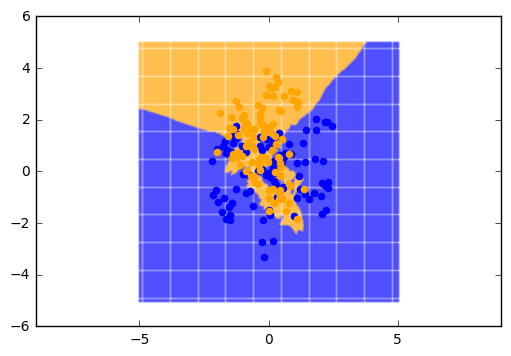

In [363]:
k = 5

# Initialize label vectors
ynnplane = np.zeros(Xplane.shape[0])

# Iterate through all points in the training set and classify them via k-NN (k=15)
for ii in range(0,Xplane.shape[0]):
    xt = Xplane[ii,:] # choose test point
    
    # Calculate distance between test point xt and all other training samples X
    d = dist_metric( xt, X )
    
    # Identify the k=15 neighborhood
    tempinds = np.argsort( d )
    N_inds = tempinds[ 0:k ] # indices of k nearest neighbors
    
    # Average the labels of all members in the neighborhood
    ynnplane[ii] = np.mean( y[ N_inds ] )

# Convert predictions to class labels
#ynnplane[ ynnp>0.5 ] = 1
#ynnplane [ynnp<=0.5 ] = 0

# plot all the points we classified as well as the hyperplane
fig5, ax5 = plt.subplots()
ax5.scatter( Xplane[ynnplane<=0.5,0], Xplane[ynnplane<=0.5,1], marker='.', color='blue', s=0.1), plt.hold('on')
ax5.scatter( Xplane[ynnplane>0.5,0], Xplane[ynnplane>0.5,1], marker='.', color='orange', s=0.1)
ax5.scatter( Xb[:,0], Xb[:,1], marker='o', color='blue')
ax5.scatter( Xo[:,0], Xo[:,1], marker='o', color='orange')
plt.axis('equal')
plt.show()

Notice that the misclassifications are easy to see on this plot (orange dots on blue background, or blue dots on orange background). If you can count the number of misclassifications in this plot it should match the number calculated in the code [here](#kNNacc). Try changing $k$ in the previous block of code to see its effect on the decision boundaries.